In [2]:
#USE AS TEMPLATE
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import transforms
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader
# from torch.nn.parallel import DataParallel

# # Step 1: Prepare the Dataset
# data_transform = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize images to the desired size
#     transforms.ToTensor(),  # Convert images to tensors
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image tensors
# ])

# dataset = ImageFolder(root='path_to_dataset', transform=data_transform)
# train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [800, 100, 100])

# # Step 2: Image Classification with ViT
# class ViTModel(nn.Module):
#     # Define ViT model architecture

# # Step 3: Description Generation with GiT
# class GiTModel(nn.Module):
#     # Define GiT model architecture

# # Step 4: Parallelize ViT and GiT Models
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Initialize ViT model
# viT_model = ViTModel(num_classes=10).to(device)
# viT_model = nn.DataParallel(viT_model)

# # Initialize GiT model
# giT_model = GiTModel(num_classes=100).to(device)
# giT_model = nn.DataParallel(giT_model)

# # Step 5: Define Optimizers and Loss Functions
# viT_optimizer = optim.Adam(viT_model.parameters(), lr=0.001)
# giT_optimizer = optim.Adam(giT_model.parameters(), lr=0.001)
# viT_criterion = nn.CrossEntropyLoss()
# giT_criterion = nn.CrossEntropyLoss()

# # Step 6: Prepare Dataloaders
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=16)
# test_loader = DataLoader(test_dataset, batch_size=16)

# # Step 7: Training Loop
# num_epochs = 10

# for epoch in range(num_epochs):
#     # Training loop for ViT
#     viT_model.train()
#     for images, labels in train_loader:
#         images = images.to(device)
#         labels = labels.to(device)

#         viT_optimizer.zero_grad()
#         author_predictions, style_predictions = viT_model(images)
#         author_loss = viT_criterion(author_predictions, labels[:, 0])
#         style_loss = viT_criterion(style_predictions, labels[:, 1])
#         viT_loss = author_loss + style_loss
#         viT_loss.backward()
#         viT_optimizer.step()

#     # Training loop for GiT
#     giT_model.train()
#     for descriptions, labels in train_loader:
#         descriptions = descriptions.to(device)
#         labels = labels.to(device)

#         giT_optimizer.zero_grad()
#         description_predictions = giT_model(descriptions)
#         description_loss = giT_criterion(description_predictions, labels[:, 2])
#         description_loss.backward()
#         giT_optimizer.step()

#     # Evaluation on validation set
#     viT_model.eval()
#     giT_model.eval()
#     with torch.no_grad():
#         total_correct_viT = 0
#         total_correct_giT = 0
#         total_samples = 0

#         for images, descriptions, labels in val_loader:
#             images = images.to(device)
#             descriptions = descriptions.to(device)
#             labels = labels.to(device)

#             author_predictions, style_predictions = viT_model(images)
#             _, author_predicted = torch.max(author_predictions, 1)
#             _, style_predicted = torch.max(style_predictions, 1)
#             total_correct_viT += (author_predicted == labels[:, 0]).sum().item() + (style_predicted == labels[:, 1]).sum().item()

#             description_predictions = giT_model(descriptions)
#             _, description_predicted = torch.max(description_predictions, 1)
#             total_correct_giT += (description_predicted == labels[:, 2]).sum().item()

#             total_samples += labels.size(0)

#         accuracy_viT = total_correct_viT / total_samples
#         accuracy_giT = total_correct_giT / total_samples
#         print(f"Epoch {epoch+1}: ViT Accuracy - {accuracy_viT}, GiT Accuracy - {accuracy_giT}")

# # Step 8: Inference and Prediction
# viT_model.eval()
# giT_model.eval()
# with torch.no_grad():
#     for images, descriptions, labels in test_loader:
#         images = images.to(device)
#         descriptions = descriptions.to(device)

#         author_predictions, style_predictions = viT_model(images)
#         description_predictions = giT_model(descriptions)

#         # Perform appropriate aggregation of predictions
#         final_predictions = ...  # Combine the predictions from ViT and GiT

#         # Make use of the final_predictions for your desired task


# # Training loop for GiT
# for epoch in range(num_epochs):
#     viT_model.train()
#     giT_model.train()
#     for images, descriptions, labels in train_loader:
#         images = images.to(device)
#         descriptions = descriptions.to(device)
#         labels = labels.to(device)

#         viT_optimizer.zero_grad()
#         giT_optimizer.zero_grad()

#         # Forward pass through ViT
#         author_predictions, style_predictions = viT_model(images)
#         author_loss = viT_criterion(author_predictions, labels[:, 0])
#         style_loss = viT_criterion(style_predictions, labels[:, 1])

#         # Forward pass through GiT
#         description_predictions = giT_model(images, descriptions)
#         description_loss = giT_criterion(description_predictions, labels[:, 2])

#         # Compute total loss
#         total_loss = author_loss + style_loss + description_loss

#         # Backpropagation and optimization
#         total_loss.backward()
#         viT_optimizer.step()
#         giT_optimizer.step()

#     # Evaluation on validation set
#     viT_model.eval()
#     giT_model.eval()
#     with torch.no_grad():
#         total_correct_viT = 0
#         total_correct_giT = 0
#         total_samples = 0

#         for images, descriptions, labels in val_loader:
#             images = images.to(device)
#             descriptions = descriptions.to(device)
#             labels = labels.to(device)

#             # ViT predictions
#             author_predictions, style_predictions = viT_model(images)
#             _, author_predicted = torch.max(author_predictions, 1)
#             _, style_predicted = torch.max(style_predictions, 1)
#             total_correct_viT += (author_predicted == labels[:, 0]).sum().item() + (style_predicted == labels[:, 1]).sum().item()

#             # GiT predictions
#             description_predictions = giT_model(images, descriptions)
#             _, description_predicted = torch.max(description_predictions, 1)
#             total_correct_giT += (description_predicted == labels[:, 2]).sum().item()

#             total_samples += labels.size(0)

#         accuracy_viT = total_correct_viT / total_samples
#         accuracy_giT = total_correct_giT / total_samples
#         print(f"Epoch {epoch+1}: ViT Accuracy - {accuracy_viT}, GiT Accuracy - {accuracy_giT}")

# # Inference and Prediction
# viT_model.eval()
# giT_model.eval()
# with torch.no_grad():
#     for images, descriptions, labels in test_loader:
#         images = images.to(device)
#         descriptions = descriptions.to(device)

#         # ViT predictions
#         author_predictions, style_predictions = viT_model(images)
#         _, author_predicted = torch.max(author_predictions, 1)
#         _, style_predicted = torch.max(style_predictions, 1)

#         # GiT predictions
#         description_predictions = giT_model(images, descriptions)
#         _, description_predicted = torch.max(description_predictions, 1)

#         # Perform appropriate aggregation of predictions
#         final_predictions = ...  # Combine the predictions from ViT and GiT

#         # Make use of the final_predictions for your desired task


In [3]:
import pandas as pd
import datasets
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.nn.parallel import DataParallel

In [4]:
train_data = pd.read_csv('./toy_dataset_label.csv',sep='\t',encoding='latin-1')
print(f'coumns:{[x for x in train_data.columns]}')

coumns:['ID', 'FILE', 'AUTHOR', 'BORN-DIED', 'TITLE', 'DATE', 'TECHNIQUE', 'LOCATION', 'FORM', 'TYPE', 'SCHOOL', 'TIMELINE', 'URL']


In [5]:
train_data.describe()

,ID
count,43455.000000
mean,21728.000000
std,12544.522311
min,1.000000
25%,10864.500000
50%,21728.000000
75%,32591.500000
max,43455.000000


In [6]:
train_data.head()

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL
0,1,1.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/allegory.html
1,2,2.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)","Bacchus, Ceres and Cupid",-,"Oil on canvas, 163 x 113 cm","Kunsthistorisches Museum, Vienna",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/bacchus.html
2,3,3.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Joking Couple,-,"Copperplate, 25 x 20 cm","Kunsthistorisches Museum, Vienna",painting,genre,German,1601-1650,http://www.wga.hu/html/a/aachen/j_couple.html
3,4,4.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Portrait of Emperor Rudolf II,1590s,"Oil on canvas, 60 x 48 cm","Kunsthistorisches Museum, Vienna",painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/rudolf2.html
4,5,5.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Self-Portrait with a Glass of Wine,c. 1596,"Oil on canvas, 53 x 44 cm",Private collection,painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/selfport.html


In [7]:
import requests
from bs4 import BeautifulSoup,Comment
import numpy as np

def get_description(url):    
    r = requests.get(url)
    html_content = r.text

    soup = BeautifulSoup(html_content,'html.parser')

    comment = soup.find(string=lambda text: isinstance(text,Comment))
    if not comment:
        return 0
    
    parent_element = comment.find_parent()
    p_tag=parent_element.find('p')
    text_content = ''.join(p_tag.stripped_strings)
    return text_content

In [8]:
features = ['FILE','AUTHOR','URL']
train_data = train_data[features]
train_data = train_data[:500]
# train_data['TECHNIQUE'] = train_data['TECHNIQUE'].str.split(',').str[0]
# train_data['TECHNIQUE'] = train_data['TECHNIQUE'].str.split(':').str[0]
train_data.head()

,FILE,AUTHOR,URL
0,1.jpg,"AACHEN, Hans von",http://www.wga.hu/html/a/aachen/allegory.html
1,2.jpg,"AACHEN, Hans von",http://www.wga.hu/html/a/aachen/bacchus.html
2,3.jpg,"AACHEN, Hans von",http://www.wga.hu/html/a/aachen/j_couple.html
3,4.jpg,"AACHEN, Hans von",http://www.wga.hu/html/a/aachen/rudolf2.html
4,5.jpg,"AACHEN, Hans von",http://www.wga.hu/html/a/aachen/selfport.html


In [9]:
from tqdm import tqdm

with tqdm(total=len(train_data)) as pbar:
    for idx in range(train_data.shape[0]):
        pbar.set_description(f'Art Piece N°: {idx}')
        train_data['FILE'][idx] = './images/'+str(idx+1)+'.jpg'
        train_data['URL'][idx] = get_description(train_data['URL'][idx])
        pbar.update()

Art Piece N°: 499: 100%|██████████| 500/500 [05:39<00:00,  1.47it/s]


In [10]:
train_data.dropna()
train_data = train_data[train_data['URL'] != 0]

In [11]:
train_data = train_data.rename(columns={'FILE':'image','AUTHOR':'label','URL':'description'})

In [12]:
labels_cat = train_data['label'].unique()
label2id, id2label = dict(), dict()
for i, label in enumerate(labels_cat):
    label2id[label]=i
    id2label[i]=label

In [13]:
train_data['label'] = train_data['label'].map(label2id)
train_data.columns

Index(['image', 'label', 'description'], dtype='object')

In [14]:
train_dataset = datasets.Dataset.from_dict(train_data).cast_column('image',datasets.Image())
train_dataset_git = datasets.Dataset.from_dict(train_data[['image','description']]).cast_column('image',datasets.Image())
train_dataset_vit = datasets.Dataset.from_dict(train_data[['image','label']]).cast_column('image',datasets.Image())
print(train_dataset)

Dataset({
    features: ['image', 'label', 'description'],
    num_rows: 424
})


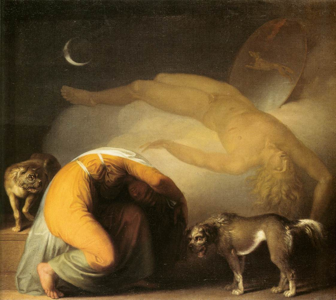

Description: The subject is taken from the Songs of Ossian.
Author: 8


In [15]:
sample = train_dataset[26]

image = sample['image']
height,width = image.size
display(image.resize((int(0.3*height),int(0.3*width))))
caption = sample['description']
author = sample['label']
# technique = sample['technique']
print(f'Description: {caption}')
print(f'Author: {author}')
# print(f'Technique: {technique}')

In [16]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], text=item["description"], padding="max_length", return_tensors="pt", truncation=True)
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding

In [17]:
from torch.utils.data import Dataset

class ImageClassificationDataset(Dataset):
    
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], text=item["label"], padding="max_length", return_tensors="pt", truncation=True)
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding

In [18]:
from transformers import AutoProcessor

processor_clas = AutoProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
processor_capt = AutoProcessor.from_pretrained("microsoft/git-base")

In [19]:
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

normalize = Normalize(mean=processor_clas.image_mean, std=processor_clas.image_std)

size = (

    processor_clas.size["shortest_edge"]

    if "shortest_edge" in processor_clas.size

    else (processor_clas.size["height"], processor_clas.size["width"])

)

_transforms = Compose([RandomResizedCrop(size), ToTensor(), normalize])

In [20]:
def transforms(examples):
    examples['pixel_values'] = [_transforms(img.convert('RGB'))for img in examples['image']]
    del examples['image']
    return examples

In [21]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

checkpoint= 'google/vit-base-patch16-224-in21k'

model_clas = AutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels = len(labels_cat),
    id2label = id2label,
    label2id = label2id
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
train_capt = ImageCaptioningDataset(train_dataset_git,processor_capt)
train_clas = ImageClassificationDataset(train_dataset_vit,processor_clas)
print(train_clas.dataset)
train_clas = train_dataset_vit.with_transform(transforms)

Dataset({
    features: ['image', 'label'],
    num_rows: 424
})


In [23]:
from torch.utils.data import DataLoader
train_dataloader_vit = DataLoader(train_clas,shuffle=True,batch_size=2)
train_dataloader_git = DataLoader(train_capt,shuffle=True,batch_size=2)

In [24]:
from transformers import AutoModelForCausalLM

model_capt = AutoModelForCausalLM.from_pretrained('microsoft/git-base')

In [25]:
batch = next(iter(train_dataloader_git))
for k,v in batch.items():
    print(k,v.shape)

input_ids torch.Size([2, 512])
attention_mask torch.Size([2, 512])
pixel_values torch.Size([2, 3, 224, 224])


In [26]:
outputs = model_capt(input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask'],
                pixel_values=batch['pixel_values'],
                labels=batch['input_ids'])

outputs.loss

tensor(11.1353, grad_fn=<NllLossBackward0>)

In [27]:
device = 'cpu'
vit_model = nn.DataParallel(model_clas)
git_model = nn.DataParallel(model_capt)

In [28]:
vit_optimizer = torch.optim.AdamW(vit_model.parameters(), lr=1e-5)
git_optimizer = torch.optim.AdamW(git_model.parameters(),lr=5e-5)
vit_criterion = nn.CrossEntropyLoss()
git_criterion = nn.CrossEntropyLoss()

In [29]:
num_epochs = 2

In [30]:
with tqdm(total=num_epochs) as pbar_epoch:
    for epoch in range(num_epochs):
        pbar_epoch.set_description(f'Epoch N°: {epoch}')
        #Train Loop GiT
        git_model.train()
        with tqdm(total=len(train_dataloader_git)) as pbar_git:
            for idx, batch in enumerate(train_dataloader_git):
                pbar_git.set_description(f'batch: {idx}')
                input_ids = batch.pop('input_ids').to(device)
                pixel_values=batch.pop('pixel_values').to(device)

                outputs = git_model(input_ids=input_ids,
                                pixel_values=pixel_values,
                                labels = input_ids)
                loss = outputs.loss

                print('Loss: ', loss.item(), end='\r')

                loss.backward()

                git_optimizer.step()
                git_optimizer.zero_grad()
                pbar_git.update()
        #Train Loop ViT

        vit_model.train()
        print('ViT Model')
        with tqdm(total=len(train_dataloader_vit)) as pbar_vit:
            for idx, batch in enumerate(train_dataloader_vit):
                pbar_vit.set_description(f'batch: {idx}')
                labels = batch.pop('label').to(device)
                pixel_values=batch.pop('pixel_values').to(device)

                outputs = vit_model(
                                pixel_values=pixel_values,
                                labels = labels)
                loss = outputs.loss
                
                print('Loss: ', loss.item(), end='\r')

                loss.backward()

                vit_optimizer.step()
                vit_optimizer.zero_grad()
                pbar_vit.update()
        pbar_epoch.update()

Epoch N°: 0:   0%|          | 0/2 [00:00<?, ?it/s]

batch: 211: 100%|██████████| 212/212 [10:34<00:00,  2.99s/it]


ViT Model6537621021270752


batch: 1:   1%|          | 2/212 [00:00<00:59,  3.55it/s]

batch: 4:   2%|▏         | 5/212 [00:01<00:40,  5.14it/s]

batch: 8:   4%|▍         | 8/212 [00:01<00:33,  6.01it/s]


batch: 9:   5%|▍         | 10/212 [00:01<00:32,  6.15it/s]

batch: 15:   8%|▊         | 16/212 [00:03<00:34,  5.65it/s]


batch: 30:  15%|█▍        | 31/212 [00:05<00:30,  5.97it/s]

batch: 32:  16%|█▌        | 33/212 [00:06<00:30,  5.84it/s]


batch: 34:  17%|█▋        | 35/212 [00:06<00:30,  5.79it/s]

batch: 39:  19%|█▉        | 40/212 [00:07<00:29,  5.88it/s]


batch: 41:  20%|█▉        | 42/212 [00:07<00:30,  5.61it/s]

batch: 45:  22%|██▏       | 46/212 [00:08<00:27,  5.96it/s]

batch: 48:  23%|██▎       | 49/212 [00:08<00:27,  5.91it/s]


batch: 51:  25%|██▍       | 52/212 [00:09<00:26,  6.07it/s]

batch: 54:  25%|██▌       | 54/212 [00:09<00:24,  6.50it/s]

batch: 61:  29%|██▉       | 62/212 [00:10<00:23,  6.28it/s]


batch: 63:  30%|███       | 64/212 [00:11<00:23,  6.22it/s]


batch: 67:  32%|███▏      | 68/212 [00:11<00:22,  6.52it/s]

batch: 69:  33%|███▎      | 70/212 [00:12<00:22,  6.40it/s]

batch: 74:  35%|███▌      | 75/212 [00:13<00:23,  5.79it/s]

batch: 78:  37%|███▋      | 79/212 [00:13<00:22,  5.81it/s]

batch: 95:  45%|████▌     | 96/212 [00:16<00:20,  5.60it/s]


batch: 97:  46%|████▌     | 98/212 [00:17<00:20,  5.65it/s]

batch: 101:  48%|████▊     | 102/212 [00:17<00:18,  5.87it/s]

batch: 106:  50%|█████     | 106/212 [00:18<00:17,  5.98it/s]


batch: 107:  51%|█████     | 108/212 [00:18<00:17,  5.95it/s]

batch: 117:  56%|█████▌    | 118/212 [00:20<00:15,  5.97it/s]

batch: 121:  58%|█████▊    | 122/212 [00:21<00:15,  5.79it/s]


batch: 123:  58%|█████▊    | 124/212 [00:21<00:15,  5.72it/s]


batch: 125:  59%|█████▉    | 126/212 [00:21<00:14,  5.83it/s]

batch: 134:  64%|██████▎   | 135/212 [00:23<00:13,  5.69it/s]


batch: 136:  65%|██████▍   | 137/212 [00:23<00:13,  5.74it/s]


batch: 138:  66%|██████▌   | 139/212 [00:24<00:12,  6.01it/s]


batch: 140:  67%|██████▋   | 141/212 [00:24<00:11,  5.97it/s]


batch: 142:  67%|██████▋   | 143/212 [00:24<00:11,  5.82it/s]


batch: 144:  68%|██████▊   | 145/212 [00:25<00:11,  5.78it/s]


batch: 146:  69%|██████▉   | 147/212 [00:25<00:10,  5.94it/s]


batch: 148:  70%|███████   | 149/212 [00:25<00:10,  6.05it/s]

batch: 152:  72%|███████▏  | 153/212 [00:26<00:10,  5.46it/s]


batch: 154:  73%|███████▎  | 155/212 [00:27<00:10,  5.64it/s]

batch: 158:  75%|███████▌  | 159/212 [00:27<00:08,  5.95it/s]

batch: 161:  76%|███████▋  | 162/212 [00:28<00:08,  5.91it/s]


batch: 163:  77%|███████▋  | 164/212 [00:28<00:07,  6.26it/s]


batch: 165:  78%|███████▊  | 166/212 [00:28<00:07,  5.97it/s]


batch: 167:  79%|███████▉  | 168/212 [00:29<00:07,  5.53it/s]


batch: 170:  80%|████████  | 170/212 [00:29<00:07,  5.84it/s]

batch: 176:  83%|████████▎ | 177/212 [00:30<00:06,  5.69it/s]


batch: 178:  84%|████████▍ | 179/212 [00:31<00:05,  5.91it/s]

batch: 190:  90%|█████████ | 191/212 [00:33<00:03,  5.89it/s]

batch: 197:  93%|█████████▎| 198/212 [00:34<00:02,  5.67it/s]

Epoch N°: 1:  50%|█████     | 1/2 [11:11<11:11, 671.91s/it]

Epoch N°: 1:  50%|█████     | 1/2 [11:13<11:13, 673.00s/it]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\rullo\AppData\Local\Temp\ipykernel_6768\1314046217.py:21 in <module>                    │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ 'C:\\Users\\rullo\\AppData\\Local\\Temp\\ipykernel_6768\\1314046217.py'                          │
│                                                                                                  │
│ d:\envs\tf\lib\site-packages\torch\optim\optimizer.py:280 in wrapper                             │
│                                                                                                  │
│   277 │   │   │   │   │   │   │   raise RuntimeError(f"{func} must return None or a tuple of (   │
│   278 │   │   │   │   │   │   │   │   │   │   │      f"but got {result}.")                       │
│   279 │   │   │   │                                                                              │
│ ❱ 280 │   │   │   │   out = func(*args, **kwargs)                                                │
│   281 │   │   │   │   self._optimizer_step_code()                                                │
│   282 │   │   │   │                                                                              │
│   283 │   │   │   │   # call optimizer step post hooks                                           │
│                                                                                                  │
│ d:\envs\tf\lib\site-packages\torch\optim\optimizer.py:33 in _use_grad                            │
│                                                                                                  │
│    30 │   │   prev_grad = torch.is_grad_enabled()                                                │
│    31 │   │   try:                                                                               │
│    32 │   │   │   torch.set_grad_enabled(self.defaults['differentiable'])                        │
│ ❱  33 │   │   │   ret = func(self, *args, **kwargs)                                              │
│    34 │   │   finally:                                                                           │
│    35 │   │   │   torch.set_grad_enabled(prev_grad)                                              │
│    36 │   │   return ret                                                                         │
│                                                                                                  │
│ d:\envs\tf\lib\site-packages\torch\optim\adamw.py:171 in step                                    │
│                                                                                                  │
│   168 │   │   │   │   state_steps,                                                               │
│   169 │   │   │   )                                                                              │
│   170 │   │   │                                                                                  │
│ ❱ 171 │   │   │   adamw(                                                                         │
│   172 │   │   │   │   params_with_grad,                                                          │
│   173 │   │   │   │   grads,                                                                     │
│   174 │   │   │   │   exp_avgs,                                                                  │
│                                                                                                  │
│ d:\envs\tf\lib\site-packages\torch\optim\adamw.py:321 in adamw                                   │
│                                                                                                  │
│   318 │   else:                                                                                  │
│   319 │   │   func = _single_tensor_adamw                  

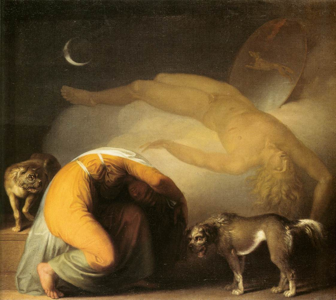

Author: ABILDGAARD, Nicolai
Description: The subject is taken from the Songs of Ossian.


In [31]:
sample = train_dataset[26]
image = sample['image']
height,width = image.size
display(image.resize((int(0.3*height),int(0.3*width))))
caption = sample['label']
desc = sample['description']
print(f'Author: {id2label[caption]}')
print(f'Description: {desc}')

In [38]:
from transformers import AutoImageProcessor

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

image_processor = AutoImageProcessor.from_pretrained(checkpoint)

inputs = image_processor(image, return_tensors="pt").to(device)

with torch.no_grad():
    logits = model_clas(**inputs).logits

In [39]:

inputs = processor_capt(images = image, return_tensors='pt').to(device)
pixel_values = inputs.pixel_values

generated_ids = model_capt.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor_capt.batch_decode(generated_ids,skip_special_tokens=True)[0]
print(generated_caption)

the most important example of the architecture in the world of the world of the first of the most important and the world of the world.


In [40]:
predicted_label = logits.argmax(-1).item()
model_clas.config.id2label[predicted_label]

'AERTSEN, Pieter'